# Hubble's Data
This is a working notebook to plot up Hubble's initial data.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [4]:
data = pd.read_csv('hubble_data.csv')

y =  456.483x + -44.360


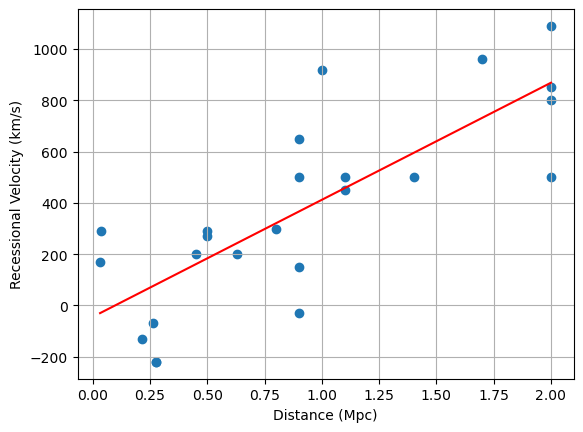

In [21]:
distance = data.iloc[:, 1]
velocity = data.iloc[:, 2]

slope, intercept = np.polyfit(distance, velocity, 1)
print(f"y =  {slope:.3f}x + {intercept:.3f}")

plt.scatter(distance, velocity, marker = 'o')
plt.plot(distance, slope * distance + intercept, color = 'red')
plt.xlabel("Distance (Mpc)")
plt.ylabel("Recessional Velocity (km/s)")
plt.grid()
plt.show()

In [31]:
#Test code
H0 = slope * 0.00102271
Or0 = 0.0014936944554559174
Om0 = 0.30966
Ode0 = 0.6888463055445441
a = np.linspace(1e-10, 3, 5000)
expr = lambda a: 1 / np.sqrt(Or0/a**2 + Om0/a + Ode0*a**2)
t = np.array([integrate.quad(expr, 0, i)[0]/H0 for i in a])
coefs = np.polyfit(t, a, 9)
scale_factor = np.poly1d(coefs)
print(scale_factor)
t = np.linspace(1e-10, 30)
a = scale_factor(t)

           9            8           7          6          5         4
0.0002088 x - 0.004778 x + 0.04638 x - 0.2489 x + 0.8073 x - 1.627 x
          3         2
 + 2.041 x - 1.553 x + 1.075 x + 0.02016


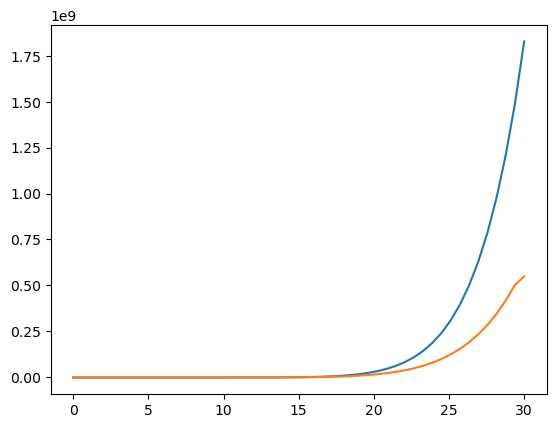

In [32]:
plt.plot(t,a) # scale factor
da_dt = np.gradient(a, t) #derivative of scale factor
plt.plot(t, da_dt)